<a href="https://colab.research.google.com/github/Arthur-Barreto/Exoplanets/blob/main/RegressaoPolinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import pandas as pd

import numpy as np
import pickle
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Polinomial regression for fitting light curve

## First, let's import the data frame

In [ ]:
base = pd.read_pickle('/content/gdrive/MyDrive/logArthur/df_filtered.pkl')

base.tail()

,sky_position,max_power,period_at_max_power,transit_time_at_max_power,duration_at_max_power,has_flux,lc_flux,lc_flux_2
977,Kepler-992,70047.332502,26.17941794179418 d,143.109335,0.33 d,1,"[1.0008823871612549, 1.0000814199447632, 0.999...","[1.0008823871612549, 1.0000814199447632, 0.999..."
979,Kepler-994,13975.840513,347.96519651965195 d,381.677266,0.33 d,1,"[1.0026289861438968, 1.0031007410387198, 1.002...","[1.0026289861438968, 1.0031007410387198, 1.002..."
980,Kepler-995,65057.308271,18.3981398139814 d,140.928033,0.33 d,1,"[0.9999604452048021, 1.0000610666857797, 0.999...","[0.9999604452048021, 1.0000610666857797, 0.999..."
981,Kepler-996,48.911612,22.62796279627963 d,144.567433,0.25 d,0,"[1.0000429087866467, 0.999736766387529, 0.9998...","[1.0000429087866467, 0.999736766387529, 0.9998..."
983,Kepler-998,253.822173,16.96159615961596 d,143.011726,0.1 d,0,"[1.0000904203054084, 1.0000009536748848, 1.000...","[1.0000904203054084, 1.0000009536748848, 1.000..."


In [ ]:
base.describe()

,max_power,transit_time_at_max_power,has_flux
count,5.480000e+02,548.000000,548.000000
mean,4.392938e+04,185.054270,0.452555
std,2.674665e+05,78.707839,0.498199
min,2.973308e+01,120.754127,0.000000
25%,2.735718e+02,138.170839,0.000000
50%,7.635670e+02,148.887245,0.000000
75%,3.508068e+03,189.943774,1.000000
max,4.499717e+06,509.292285,1.000000


### Filter by the 5 minimum periods and 5 maximum periods

In [ ]:
lis_menores = []
lis_maiores = []

for position in [781,360,66,159,977]:
    sky_positon = 'Kepler-' + str(position)
    f = (np.array(base.loc[base['sky_position'] == sky_positon]['lc_flux_2']))
    lis_menores.append(f[0])

for position in [987,537,332,402,755]:
    sky_positon = 'Kepler-' + str(position)
    f = (np.array(base.loc[base['sky_position'] == sky_positon]['lc_flux_2']))
    lis_maiores.append(f[0])

### Creating the polinomial regretion

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=50)

X = np.arange(64000).reshape(-1, 1)

X = X.reshape(-1, 1)

X.shape

(64000, 1)

### Fitting the model

In [ ]:
X_transf = poly.fit_transform(X)
X_transf.shape

(64000, 51)

In [ ]:
X_transf

array([[1.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 1.00000000e+000, 1.00000000e+000, ...,
        1.00000000e+000, 1.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 2.00000000e+000, 4.00000000e+000, ...,
        2.81474977e+014, 5.62949953e+014, 1.12589991e+015],
       ...,
       [1.00000000e+000, 6.39970000e+004, 4.09561601e+009, ...,
        4.96205491e+230, 3.17556628e+235, 2.03226715e+240],
       [1.00000000e+000, 6.39980000e+004, 4.09574400e+009, ...,
        4.96577799e+230, 3.17799860e+235, 2.03385554e+240],
       [1.00000000e+000, 6.39990000e+004, 4.09587200e+009, ...,
        4.96950381e+230, 3.18043274e+235, 2.03544515e+240]])

### Visualizing the regression

In [ ]:
y = np.array(lis_maiores[0], dtype=np.float64) * 10000
y = y.reshape(-1, 1)
y.shape

(64000, 1)

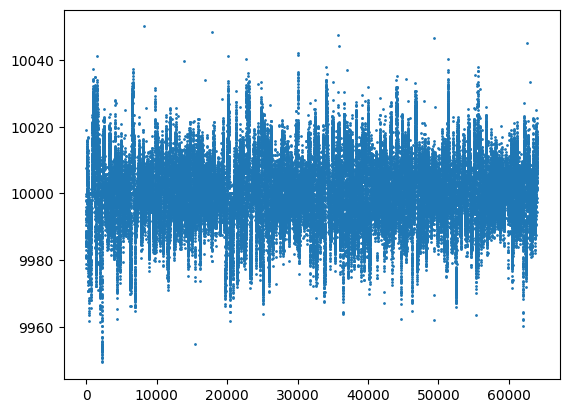

In [ ]:
plt.scatter(X, y, s=1)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_transf, y)

LinearRegression()

In [ ]:
# model.coef_, model.intercept_
model.coef_[0]

array([-4.81227040e-233, -2.25374580e-232,  7.76813765e-238,
        4.68655254e-243, -0.00000000e+000, -0.00000000e+000,
       -0.00000000e+000, -0.00000000e+000, -0.00000000e+000,
       -0.00000000e+000, -0.00000000e+000, -0.00000000e+000,
       -0.00000000e+000, -0.00000000e+000, -0.00000000e+000,
       -0.00000000e+000, -0.00000000e+000, -0.00000000e+000,
       -0.00000000e+000, -0.00000000e+000, -0.00000000e+000,
       -0.00000000e+000, -0.00000000e+000, -0.00000000e+000,
       -0.00000000e+000, -0.00000000e+000, -0.00000000e+000,
       -0.00000000e+000,  8.95246950e-321,  5.01953483e-316,
        2.80199145e-311,  1.55650791e-306,  8.59922849e-302,
        4.72159031e-297,  2.57441188e-292,  1.39250579e-287,
        7.46312954e-283,  3.95734947e-278,  2.07223809e-273,
        1.06904843e-268,  5.41672279e-264,  2.68450250e-259,
        1.29390316e-254,  6.01572705e-250,  2.66455871e-245,
        1.10188652e-240,  4.10228783e-236,  1.27311287e-231,
        2.63479497e-227,

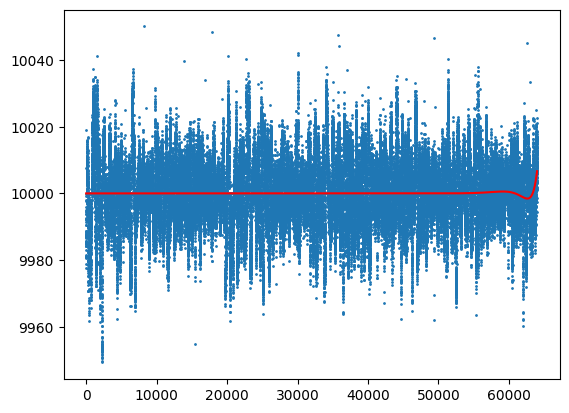

In [ ]:
# Calculate y-values using the polynomial equation
y_values = model.predict(X_transf)

plt.scatter(X, y, s=1, label='Data')
plt.plot(X, y_values, color='red', label='Polynomial Fit')

### That is obviusly that the regretion does't fit

Another aproach is lock for windowns, with 1k points, and check the regretion for that region

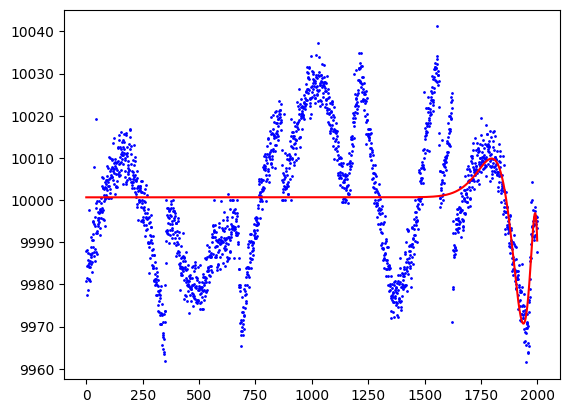

plot1, coef= [ 1.14332404e-150  3.76441059e-150 -1.54350482e-155  1.73157527e-160
  1.34929088e-291  5.26649553e-279  8.44311526e-276  1.36278221e-272
  2.21249827e-269  3.60971546e-266  5.91334769e-263  9.71942373e-260
  1.60179169e-256  2.64527925e-253  4.37524662e-250  7.24408235e-247
  1.20008637e-243  1.98837591e-240  3.29349106e-237  5.45136140e-234
  9.01286285e-231  1.48780525e-227  2.45112627e-224  4.02831787e-221
  6.60101265e-218  1.07795585e-214  1.75327474e-211  2.83849284e-208
  4.57102784e-205  7.31626351e-202  1.16286112e-198  1.83351148e-195
  2.86441635e-192  4.42761397e-189  6.75999509e-186  1.01734425e-182
  1.50530101e-179  2.18279072e-176  3.08908627e-173  4.24319384e-170
  5.61500981e-167  7.08270287e-164  8.38273675e-161  9.07839736e-158
  8.60961008e-155  6.53701523e-152  3.10439142e-149 -4.78753436e-152
  2.45980118e-155 -4.21067403e-159]


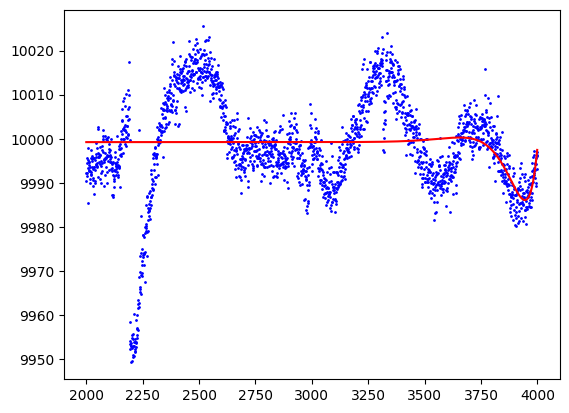

plot2, coef= [ 1.26855600e-174 -2.22223609e-175  2.86792387e-180 -1.17671868e-184
  6.56168584e-320  8.34461906e-317  3.18551237e-313  1.20059439e-309
  4.48443298e-306  1.66398619e-302  6.14322283e-299  2.25888862e-295
  8.27841090e-292  3.02521755e-288  1.10270654e-284  4.01000529e-281
  1.45500297e-277  5.26795157e-274  1.90318908e-270  6.86071960e-267
  2.46759911e-263  8.85425640e-260  3.16915755e-256  1.13130022e-252
  4.02687457e-249  1.42893730e-245  5.05353044e-242  1.78063937e-238
  6.24880713e-235  2.18309751e-231  7.58905870e-228  2.62354159e-224
  9.01309268e-221  3.07460235e-217  1.04040973e-213  3.48817592e-210
  1.15698447e-206  3.78953714e-203  1.22277543e-199  3.87498225e-196
  1.20105557e-192  3.62035299e-189  1.05262079e-185  2.91561161e-182
  7.53960568e-179  1.75522574e-175  3.40609949e-172  4.40767951e-169
 -2.27581929e-172  2.93465167e-176]


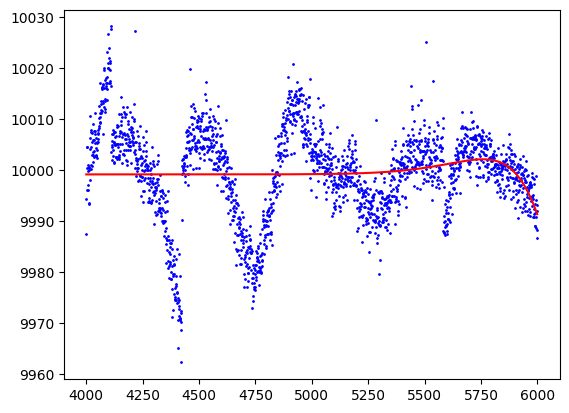

plot3, coef= [ 2.66446423e-183  8.18195875e-183  5.56479886e-189  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  9.38724727e-322  5.15086657e-318  2.80724511e-314  1.52210730e-310
  8.21936580e-307  4.42376493e-303  2.37434724e-299  1.27134126e-295
  6.79296450e-292  3.62249352e-288  1.92817019e-284  1.02443326e-280
  5.43263523e-277  2.87537094e-273  1.51873955e-269  8.00407635e-266
  4.20816826e-262  2.20661725e-258  1.15369918e-254  6.01241789e-251
  3.12200181e-247  1.61456100e-243  8.31173423e-240  4.25682329e-236
  2.16736076e-232  1.09613991e-228  5.50117279e-225  2.73634955e-221
  1.34699473e-217  6.54978598e-214  3.13850133e-210  1.47743023e-206
  6.80430925e-203  3.04840609e-199  1.31767263e-195  5.42734297e-192
  2.08752841e-188  7.23007905e-185  2.08780540e-181  4.02122132e-178
 -1.31355991e-181  1.07128058e-185]


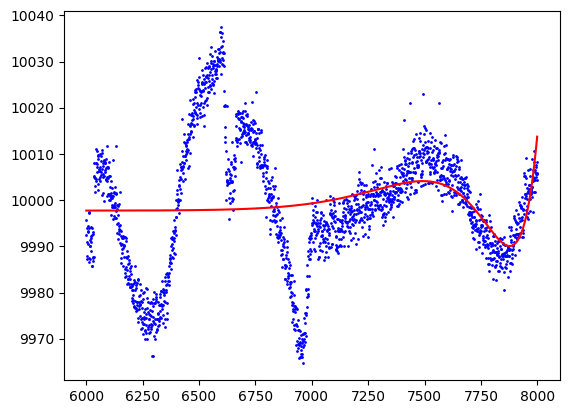

plot4, coef= [ 4.22770457e-188 -8.60797209e-188  7.01605157e-194 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000  4.94065646e-324  2.15906687e-320
  1.62095700e-316  1.21033891e-312  8.99387324e-309  6.65441001e-305
  4.90409490e-301  3.60092815e-297  2.63487851e-293  1.92155113e-289
  1.39674696e-285  1.01196310e-281  7.30766870e-278  5.25928598e-274
  3.77186212e-270  2.69521684e-266  1.91843800e-262  1.35988765e-258
  9.59665307e-255  6.73953814e-251  4.70796477e-247  3.26955764e-243
  2.25584924e-239  1.54507823e-235  1.04952018e-231  7.06183742e-228
  4.69997419e-224  3.08834070e-220  1.99887412e-216  1.27040530e-212
  7.89602731e-209  4.77213861e-205  2.78162378e-201  1.54444292e-197
  8.00500091e-194  3.73485878e-190  1.45240489e-186  3.76610868e-183
 -9.60781360e-187  6.12638021e-191]


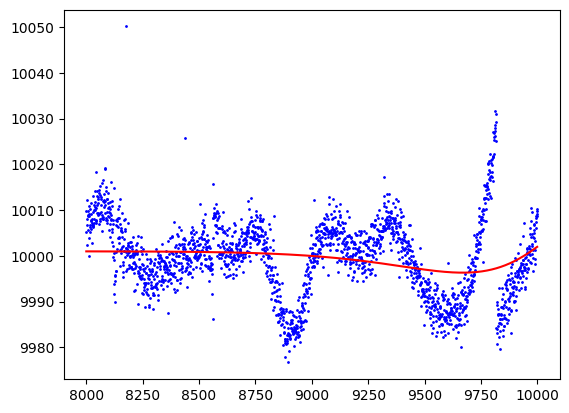

plot5, coef= [-2.11398516e-193 -7.10630747e-193  2.70818525e-199 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -2.53949742e-321 -2.35432507e-317 -2.17093093e-313
 -1.99319745e-309 -1.82270326e-305 -1.66051576e-301 -1.50730402e-297
 -1.36342914e-293 -1.22901640e-289 -1.10401292e-285 -9.88233389e-282
 -8.81396303e-278 -7.83152519e-274 -6.93107630e-270 -6.10839381e-266
 -5.35911114e-262 -4.67882031e-258 -4.06314935e-254 -3.50781956e-250
 -3.00868691e-246 -2.56177091e-242 -2.16327369e-238 -1.80959150e-234
 -1.49732032e-230 -1.22325701e-226 -9.84397145e-223 -7.77930338e-219
 -6.01233811e-215 -4.51864743e-211 -3.27551821e-207 -2.26186322e-203
 -1.45812989e-199 -8.46208898e-196 -4.09344043e-192 -1.32044475e-188
  2.60978562e-192 -1.28923951e-196]


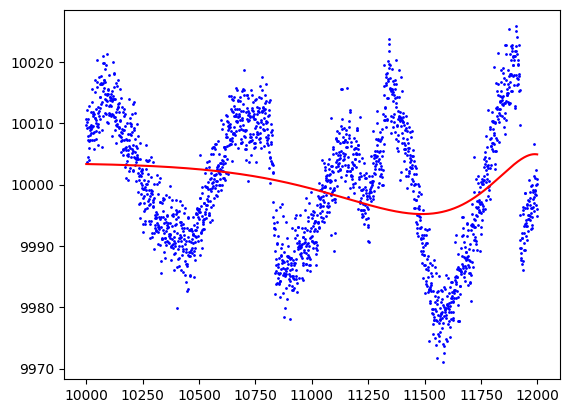

plot6, coef= [-1.45285905e-196  3.67481738e-196  2.09874185e-202  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000 -2.47032823e-323 -2.55367710e-319
 -2.84569710e-315 -3.15706432e-311 -3.48784541e-307 -3.83782302e-303
 -4.20644378e-299 -4.59274894e-295 -4.99529649e-291 -5.41207470e-287
 -5.84040725e-283 -6.27685065e-279 -6.71708553e-275 -7.15580391e-271
 -7.58659616e-267 -8.00184263e-263 -8.39261737e-259 -8.74861385e-255
 -9.05810621e-251 -9.30796409e-247 -9.48374509e-243 -9.56989582e-239
 -9.55010240e-235 -9.40784265e-231 -9.12720726e-227 -8.69407578e-223
 -8.09775661e-219 -7.33322945e-215 -6.40416463e-211 -5.32693948e-207
 -4.13592735e-203 -2.89040522e-199 -1.68351125e-195 -6.53790738e-192
  1.09171149e-195 -4.55722942e-200]


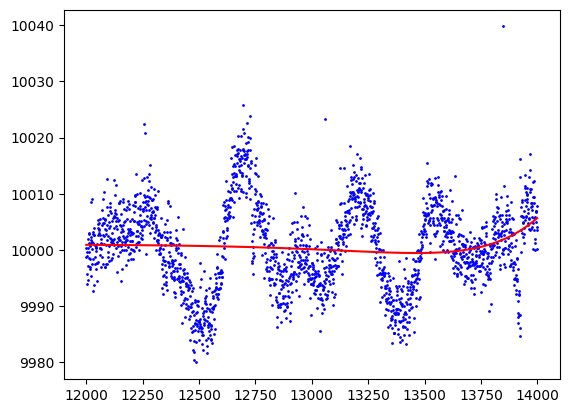

plot7, coef= [-9.42031548e-201 -2.20455804e-201  3.27413671e-207 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -9.58487353e-322 -1.25157796e-317 -1.62691607e-313 -2.10580309e-309
 -2.71435392e-305 -3.48448515e-301 -4.45492079e-297 -5.67225728e-293
 -7.19203311e-289 -9.07971289e-285 -1.14114473e-280 -1.42744033e-276
 -1.77663706e-272 -2.19942369e-268 -2.70707788e-264 -3.31090451e-260
 -4.02134071e-256 -4.84661472e-252 -5.79082664e-248 -6.85130964e-244
 -8.01514009e-240 -9.25471433e-236 -1.05224308e-231 -1.17447608e-227
 -1.28164429e-223 -1.35963247e-219 -1.39077092e-215 -1.35482445e-211
 -1.23179224e-207 -1.00793273e-203 -6.87302300e-200 -3.12450999e-196
  4.28447282e-200 -1.46385627e-204]


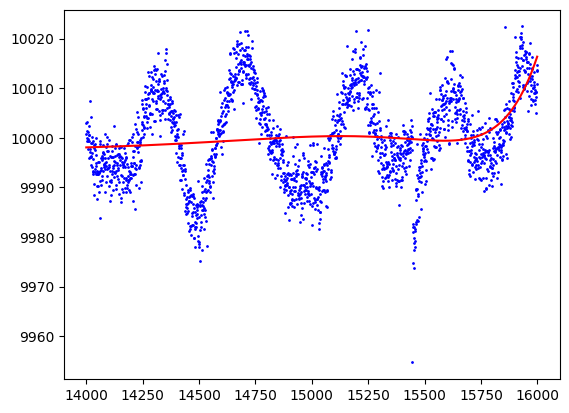

plot8, coef= [ 1.85704149e-202  6.51695758e-202 -1.04554518e-208  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  3.00885978e-321  4.50352051e-317  6.70667457e-313
  9.94464894e-309  1.46834183e-304  2.15887375e-300  3.16064798e-296
  4.60723315e-292  6.68598551e-288  9.65776198e-284  1.38827340e-279
  1.98534975e-275  2.82364216e-271  3.99214527e-267  5.60790491e-263
  7.82200392e-259  1.08249226e-254  1.48495462e-250  2.01688388e-246
  2.70833667e-242  3.58913273e-238  4.68305715e-234  5.99787635e-230
  7.50956907e-226  9.13941894e-222  1.07240468e-217  1.19825644e-213
  1.24947210e-209  1.17247282e-205  9.16773440e-202  4.77860383e-198
 -6.09717243e-202  1.94527278e-206]


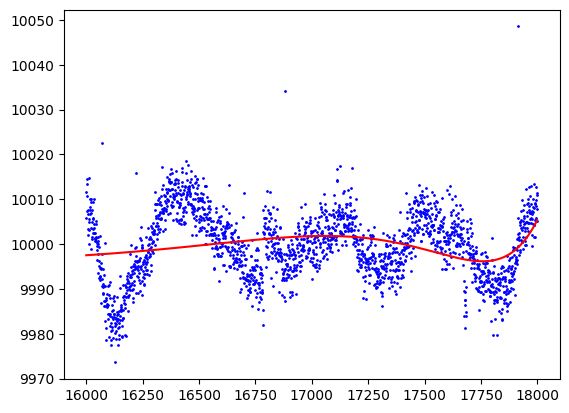

plot9, coef= [ 1.35415407e-204 -5.66717077e-204 -1.46591453e-210 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000  7.67778014e-321  1.29336618e-316
  2.16918933e-312  3.62228479e-308  6.02260418e-304  9.96987357e-300
  1.64310582e-295  2.69561930e-291  4.40143171e-287  7.15111880e-283
  1.15578042e-278  1.85757222e-274  2.96755786e-270  4.70988191e-266
  7.42171523e-262  1.16024300e-257  1.79778152e-253  2.75782395e-249
  4.18228104e-245  6.25876539e-241  9.22107468e-237  1.33342171e-232
  1.88481457e-228  2.58953708e-224  3.42988197e-220  4.32568439e-216
  5.09078207e-212  5.39116431e-208  4.75700109e-204  2.79791127e-200
 -3.15018649e-204  8.86717021e-209]


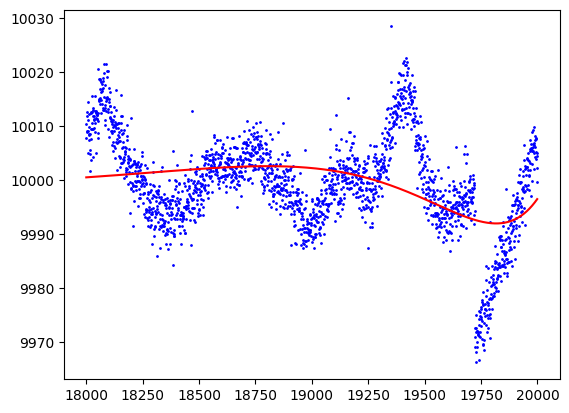

plot10, coef= [ 8.94190690e-207 -6.63742924e-207 -6.10845788e-213 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000  3.32852026e-320
  6.23066477e-316  1.16116548e-311  2.15445747e-307  3.97972559e-303
  7.31824585e-299  1.33951148e-294  2.44004058e-290  4.42243428e-286
  7.97290347e-282  1.42925751e-277  2.54658253e-273  4.50747075e-269
  7.92067967e-265  1.38074566e-260  2.38550260e-256  4.07999699e-252
  6.89809702e-248  1.15080142e-243  1.89000144e-239  3.04642604e-235
  4.79963606e-231  7.34941565e-227  1.08486498e-222  1.52472815e-218
  1.99958011e-214  2.35955238e-210  2.31979440e-206  1.52018418e-202
 -1.54334613e-206  3.91609239e-211]


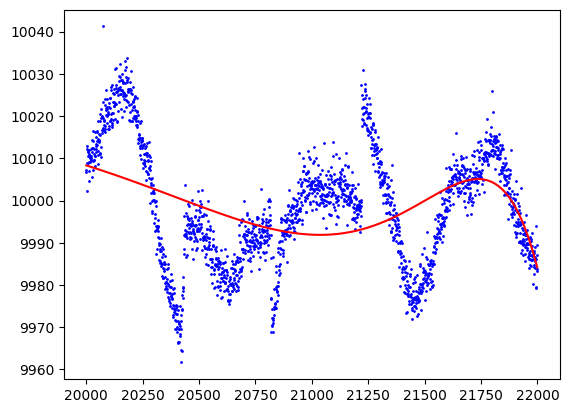

plot11, coef= [-4.44284286e-208  1.36591940e-208 -6.92940982e-214  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000 -8.89318163e-323
 -1.82187695e-318 -3.74878901e-314 -7.67931917e-310 -1.56603748e-305
 -3.17904562e-301 -6.42323255e-297 -1.29151244e-292 -2.58365410e-288
 -5.14088910e-284 -1.01708788e-279 -1.99990682e-275 -3.90631163e-271
 -7.57454529e-267 -1.45695575e-262 -2.77734462e-258 -5.24089911e-254
 -9.77575818e-250 -1.79918612e-245 -3.25965762e-241 -5.79581455e-237
 -1.00722438e-232 -1.70115996e-228 -2.76963820e-224 -4.29314561e-220
 -6.20924720e-216 -8.08031056e-212 -8.76047819e-208 -6.33047458e-204
  5.80079995e-208 -1.32905829e-212]


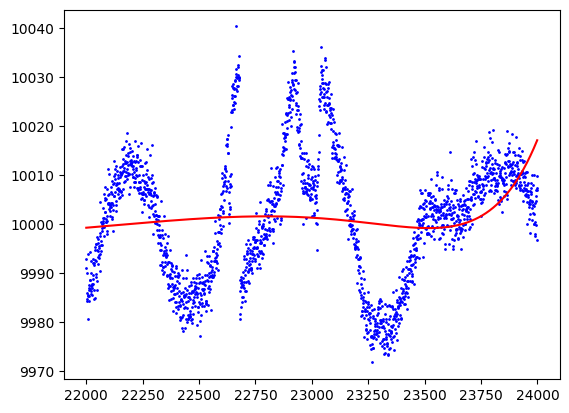

plot12, coef= [ 2.43142924e-210 -8.61431108e-211  7.40271469e-218 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
  7.50979782e-322  1.69530079e-317  3.80041661e-313  8.48096988e-309
  1.88389735e-304  4.16498632e-300  9.16305843e-296  2.00558356e-291
  4.36608193e-287  9.45022701e-283  2.03285607e-278  4.34370177e-274
  9.21359671e-270  1.93857198e-265  4.04214458e-261  8.34292015e-257
  1.70206765e-252  3.42610414e-248  6.78857664e-244  1.32004222e-239
  2.50871117e-235  4.63345901e-231  8.24904671e-227  1.39817607e-222
  2.21113807e-218  3.14616091e-214  3.72942716e-210  2.94644040e-206
 -2.49333645e-210  5.27569575e-215]


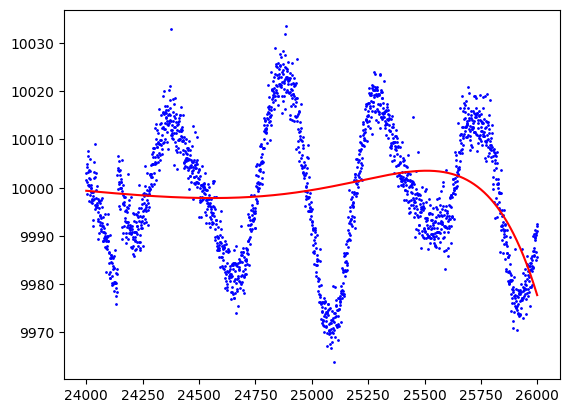

plot13, coef= [-8.53936884e-212 -1.26797896e-211  2.77399177e-218 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -6.01920176e-320 -1.46572262e-315 -3.55297706e-311
 -8.57268106e-307 -2.05859961e-302 -4.91908178e-298 -1.16938122e-293
 -2.76481182e-289 -6.49921548e-285 -1.51829817e-280 -3.52313284e-276
 -8.11528404e-272 -1.85416760e-267 -4.19815575e-263 -9.40874403e-259
 -2.08422482e-254 -4.55522568e-250 -9.79979918e-246 -2.06891671e-241
 -4.26884426e-237 -8.55967488e-233 -1.65438257e-228 -3.04412400e-224
 -5.22604069e-220 -8.07202654e-216 -1.03866833e-211 -8.90746301e-208
  6.97374127e-212 -1.36502968e-216]


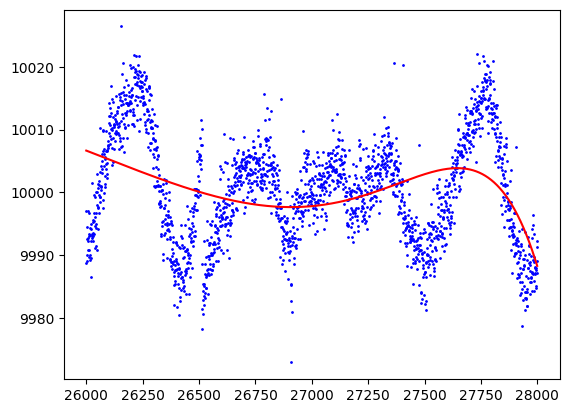

plot14, coef= [-5.02336904e-213  5.74684389e-213 -2.89881923e-219  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000 -4.24896455e-322 -1.11701029e-317 -2.92279278e-313
 -7.61222469e-309 -1.97308288e-304 -5.08891567e-300 -1.30573307e-295
 -3.33204078e-291 -8.45359685e-287 -2.13139045e-282 -5.33764710e-278
 -1.32687210e-273 -3.27166246e-269 -7.99395966e-265 -1.93334233e-260
 -4.62152428e-256 -1.08994374e-251 -2.53020010e-247 -5.76387146e-243
 -1.28323243e-238 -2.77629905e-234 -5.78960820e-230 -1.14939735e-225
 -2.12895122e-221 -3.54773439e-217 -4.92506084e-213 -4.55664938e-209
  3.27351466e-213 -5.88063867e-218]


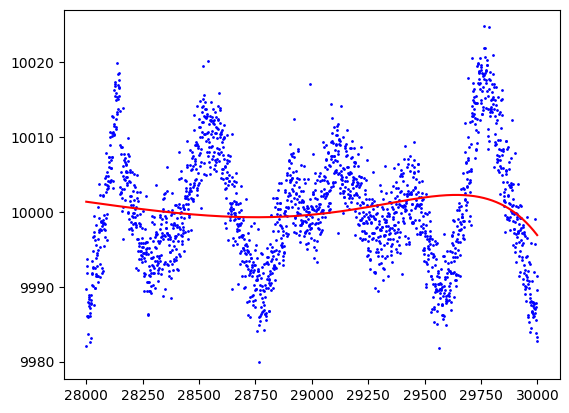

plot15, coef= [-7.37647691e-215  3.92004787e-215 -2.95679994e-221  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000 -2.45007154e-320 -6.88293661e-316
 -1.92457426e-311 -5.35558682e-307 -1.48291758e-302 -4.08476987e-298
 -1.11901619e-293 -3.04769811e-289 -8.24877207e-285 -2.21749978e-280
 -5.91727614e-276 -1.56614499e-271 -4.10759695e-267 -1.06632298e-262
 -2.73596903e-258 -6.92576553e-254 -1.72563216e-249 -4.21919146e-245
 -1.00817018e-240 -2.34099441e-236 -5.23939342e-232 -1.11632814e-227
 -2.21906196e-223 -3.96852488e-219 -5.91229645e-215 -5.87014958e-211
  3.93987267e-215 -6.61205325e-220]


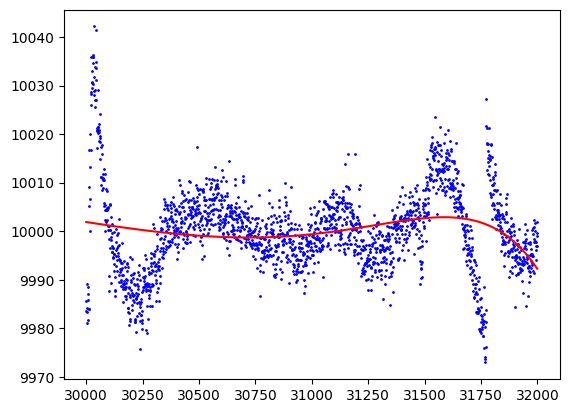

plot16, coef= [-6.79866272e-216 -7.75676263e-216  6.73250323e-222 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -3.80430547e-322 -1.14616856e-317
 -3.42469399e-313 -1.01835543e-308 -3.01305818e-304 -8.86848153e-300
 -2.59598527e-295 -7.55466179e-291 -2.18475469e-286 -6.27538479e-282
 -1.78918456e-277 -5.05958578e-273 -1.41779587e-268 -3.93233738e-264
 -1.07795978e-259 -2.91529049e-255 -7.76029588e-251 -2.02706958e-246
 -5.17459116e-242 -1.28362682e-237 -3.06908630e-233 -6.98559112e-229
 -1.48339726e-224 -2.83391939e-220 -4.51002097e-216 -4.78331710e-212
  3.00879811e-216 -4.73253514e-221]


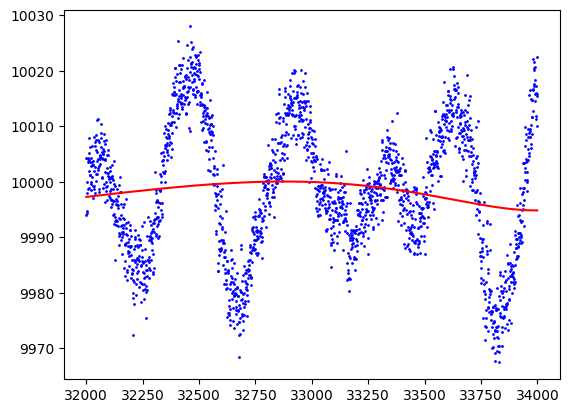

plot17, coef= [ 1.84086823e-217  1.75460209e-217 -9.08834310e-224  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  6.22621527e-320
  1.97982396e-315  6.26507435e-311  1.97265251e-306  6.17878057e-302
  1.92468823e-297  5.96035458e-293  1.83422633e-288  5.60632233e-284
  1.70088369e-279  5.11812094e-275  1.52608861e-270  4.50382656e-266
  1.31368938e-261  3.78029462e-257  1.07070598e-252  2.97579644e-248
  8.08253751e-244  2.13325183e-239  5.42673563e-235  1.31417601e-230
  2.96908939e-226  6.03480677e-222  1.02178421e-217  1.15294676e-213
 -6.75789270e-218  9.90408733e-223]


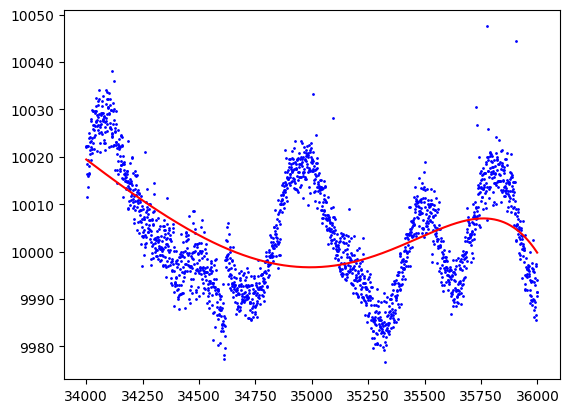

plot18, coef= [-1.00307145e-217 -1.94334822e-217 -3.38860941e-224 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -7.46533191e-321
 -2.51781189e-316 -8.44828885e-312 -2.82055179e-307 -9.36747153e-303
 -3.09393578e-298 -1.01589655e-293 -3.31475933e-289 -1.07422202e-284
 -3.45543517e-280 -1.10241744e-275 -3.48512173e-271 -1.09048028e-266
 -3.37226825e-262 -1.02883010e-257 -3.08938600e-253 -9.10299832e-249
 -2.62122108e-244 -7.33445977e-240 -1.97801771e-235 -5.07815550e-231
 -1.21627603e-226 -2.62074124e-222 -4.70400063e-218 -5.62678572e-214
  3.11652747e-218 -4.31669398e-223]


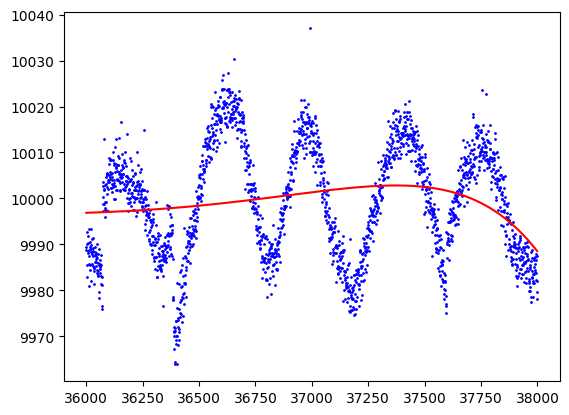

plot19, coef= [-1.33749003e-219 -4.09746899e-219  9.30371163e-226 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -2.47032823e-323
 -8.48310714e-319 -3.00844671e-314 -1.06156405e-309 -3.72622414e-305
 -1.30073337e-300 -4.51390907e-296 -1.55660206e-291 -5.33135857e-287
 -1.81242818e-282 -6.11102883e-278 -2.04170226e-273 -6.75141003e-269
 -2.20646488e-264 -7.11398334e-260 -2.25752042e-255 -7.02959615e-251
 -2.13910473e-246 -6.32521232e-242 -1.80265180e-237 -4.89055889e-233
 -1.23780324e-228 -2.81842669e-224 -5.34575784e-220 -6.75706026e-216
  3.62689178e-220 -4.86626667e-225]


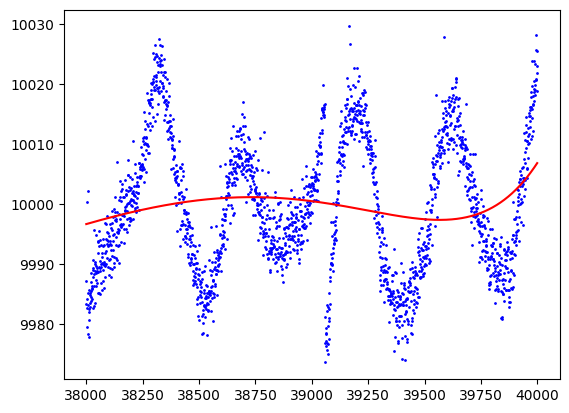

plot20, coef= [ 3.70246184e-220  1.13662003e-220  3.71564958e-226  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  6.37196463e-320  2.38140975e-315  8.85564394e-311  3.27583170e-306
  1.20508056e-301  4.40709421e-297  1.60156809e-292  5.78056823e-288
  2.07087958e-283  7.35811120e-279  2.59059179e-274  9.02718238e-270
  3.10886966e-265  1.05624027e-260  3.53201526e-256  1.15893454e-251
  3.71616403e-247  1.15789425e-242  3.47722880e-238  9.94040852e-234
  2.65105277e-229  6.36049959e-225  1.27118342e-220  1.69304272e-216
 -8.47355785e-221  1.06056023e-225]


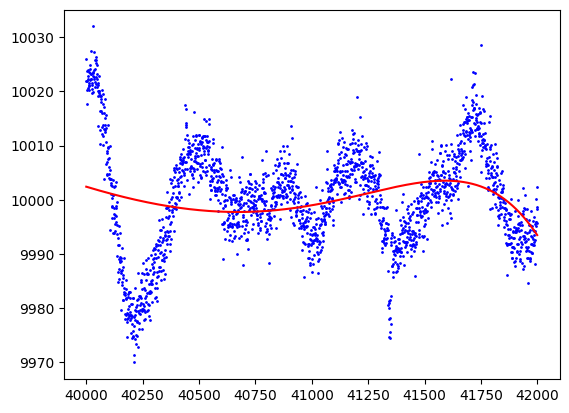

plot21, coef= [-5.02022585e-221  5.51061899e-221  1.40842318e-227  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
 -2.49997217e-321 -9.82040401e-317 -3.83853494e-312 -1.49249909e-307
 -5.77102209e-303 -2.21835057e-298 -8.47347351e-294 -3.21456243e-289
 -1.21042669e-284 -4.52042598e-280 -1.67277848e-275 -6.12653853e-271
 -2.21761449e-266 -7.91888303e-262 -2.78316239e-257 -9.59813284e-253
 -3.23468290e-248 -1.05928261e-243 -3.34333165e-239 -1.00450201e-234
 -2.81554506e-230 -7.09953714e-226 -1.49121029e-221 -2.08731329e-217
  9.94372234e-222 -1.18461443e-226]


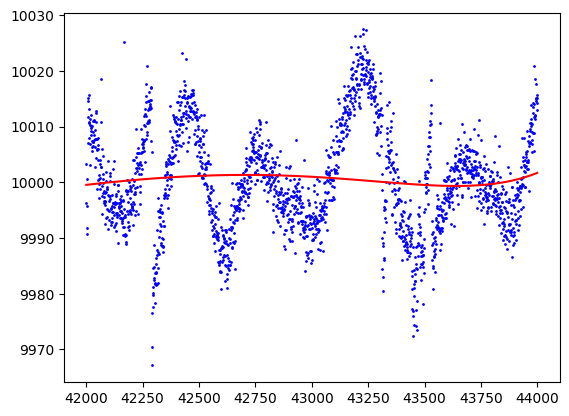

plot22, coef= [ 2.04342048e-222 -1.10983793e-222 -9.46603105e-229 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
  2.96439388e-323  1.28557363e-318  5.26936165e-314  2.14846840e-309
  8.71138969e-305  3.51141470e-300  1.40646229e-295  5.59500645e-291
  2.20915798e-286  8.65116613e-282  3.35689831e-277  1.28918977e-272
  4.89313421e-268  1.83215359e-263  6.75197542e-259  2.44157970e-254
  8.62790199e-250  2.96259427e-245  9.80447061e-241  3.08871169e-236
  9.07754573e-232  2.40000933e-227  5.28562394e-223  7.75741507e-219
 -3.52067015e-223  3.99580156e-228]


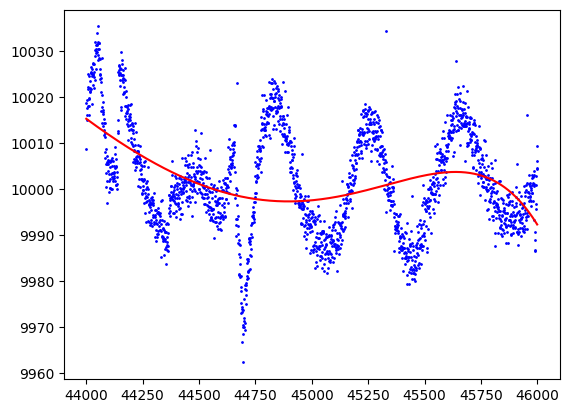

plot23, coef= [-1.72799806e-222 -3.98461149e-222 -9.29095470e-229 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -9.88131292e-324 -3.67891161e-319 -1.57787525e-314 -6.73183772e-310
 -2.85614253e-305 -1.20464778e-300 -5.04881370e-296 -2.10156539e-291
 -8.68256263e-287 -3.55772533e-282 -1.44447605e-277 -5.80445162e-273
 -2.30516200e-268 -9.03116917e-264 -3.48239902e-259 -1.31759511e-254
 -4.87166567e-250 -1.75026366e-245 -6.06055359e-241 -1.99765368e-236
 -6.14276348e-232 -1.69925534e-227 -3.91552668e-223 -6.01252682e-219
  2.60244339e-223 -2.81706878e-228]


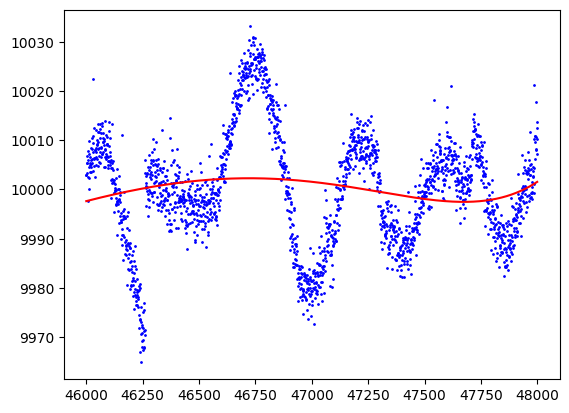

plot24, coef= [ 1.00633358e-223  5.65976162e-224 -7.97755974e-230  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  7.59378898e-321  3.40222032e-316  1.51586841e-311
  6.71651312e-307  2.95840917e-302  1.29485073e-297  5.62864060e-293
  2.42849288e-288  1.03917258e-283  4.40605604e-279  1.84894219e-274
  7.66803563e-270  3.13722197e-265  1.26327086e-260  4.99131144e-256
  1.92718320e-251  7.23035996e-247  2.61443439e-242  8.99896900e-238
  2.88962545e-233  8.34717869e-229  2.00850387e-224  3.22061675e-220
 -1.33701502e-224  1.38806690e-229]


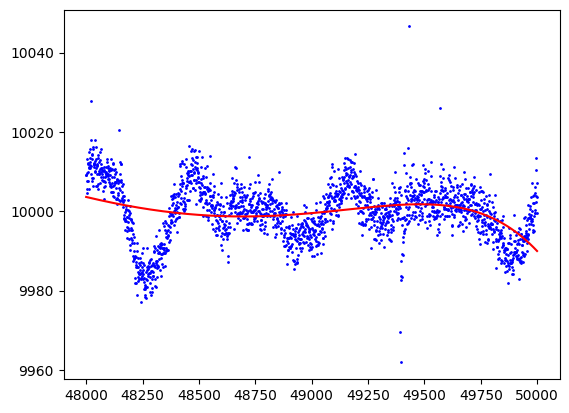

plot25, coef= [-2.13926847e-224  4.81580750e-224  2.60577252e-232  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000 -5.97819431e-322 -2.78965916e-317 -1.29570732e-312
 -5.98472526e-308 -2.74796883e-303 -1.25378986e-298 -5.68143877e-294
 -2.55528703e-289 -1.13982154e-284 -5.03783352e-280 -2.20373836e-275
 -9.52712833e-271 -4.06314792e-266 -1.70549972e-261 -7.02434671e-257
 -2.82714884e-252 -1.10565161e-247 -4.16741889e-243 -1.49524207e-238
 -5.00481432e-234 -1.50699606e-229 -3.77980506e-225 -6.31769173e-221
  2.52168822e-225 -2.51719871e-230]


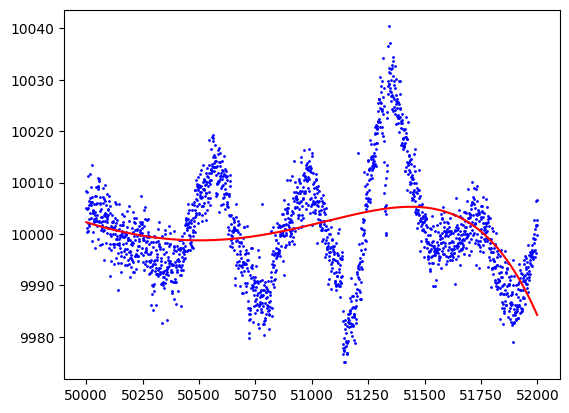

plot26, coef= [-5.26370503e-225 -2.09292836e-224  7.08668780e-232 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -5.43472210e-323 -2.74926781e-318 -1.32895347e-313
 -6.38826486e-309 -3.05270474e-304 -1.44954108e-299 -6.83589448e-295
 -3.19967918e-290 -1.48536029e-285 -6.83227668e-281 -3.11033262e-276
 -1.39936973e-271 -6.21091004e-267 -2.71309435e-262 -1.16288915e-257
 -4.87078190e-253 -1.98236876e-248 -7.77585112e-244 -2.90339038e-239
 -1.01133154e-234 -3.16904109e-230 -8.27168222e-226 -1.43876571e-221
  5.53072966e-226 -5.31690548e-231]


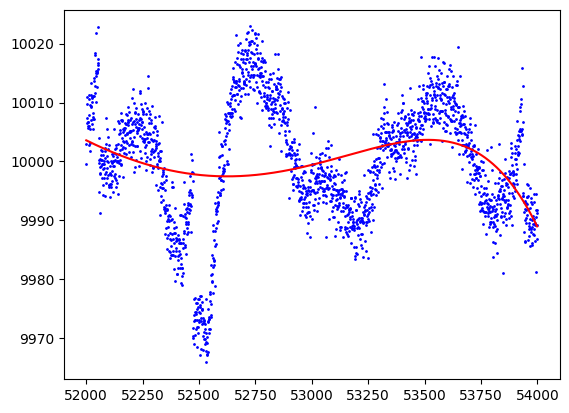

plot27, coef= [-1.02836332e-225  3.06301202e-225  6.32250797e-232  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000 -4.94065646e-324 -2.22764318e-319 -1.11894638e-314
 -5.58925743e-310 -2.77540483e-305 -1.36943381e-300 -6.71078757e-296
 -3.26400521e-291 -1.57449443e-286 -7.52555142e-282 -3.55993386e-277
 -1.66428782e-272 -7.67557143e-268 -3.48400326e-263 -1.55170375e-258
 -6.75343422e-254 -2.85604206e-249 -1.16407489e-244 -4.51637420e-240
 -1.63466291e-235 -5.32244736e-231 -1.44352687e-226 -2.60895935e-222
  9.63211371e-227 -8.89336870e-232]


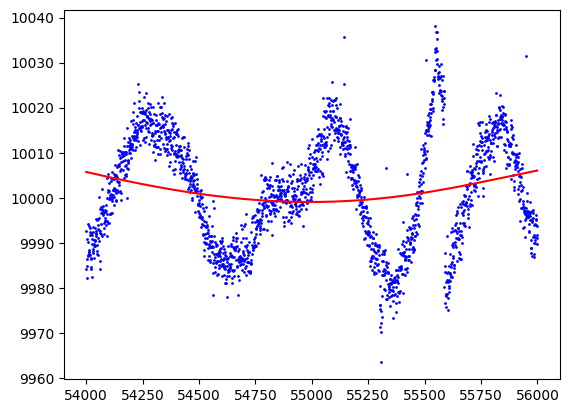

plot28, coef= [-5.23940064e-227  1.89724084e-227  3.41158650e-233  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000 -4.86160596e-321 -2.53395801e-316
 -1.31341127e-311 -6.76749953e-307 -3.46495019e-302 -1.76190417e-297
 -8.89224181e-293 -4.45094236e-288 -2.20748814e-283 -1.08355257e-278
 -5.25633807e-274 -2.51542383e-269 -1.18474096e-264 -5.47516052e-260
 -2.47260488e-255 -1.08501427e-250 -4.58871818e-246 -1.84730585e-241
 -6.93768103e-237 -2.34387012e-232 -6.59601905e-228 -1.23696675e-223
  4.35389256e-228 -3.83225075e-233]


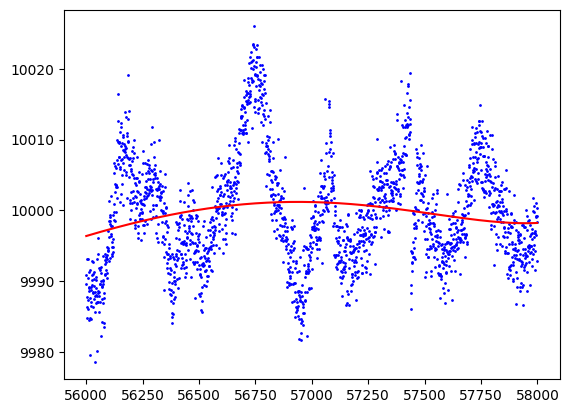

plot29, coef= [ 1.11189751e-227 -2.00471338e-227 -5.44339204e-234 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000  4.54540394e-322  2.45981599e-317
  1.32126207e-312  7.05505422e-308  3.74327660e-303  1.97250867e-298
  1.03164085e-293  5.35117034e-289  2.75025930e-284  1.39895138e-279
  7.03254009e-275  3.48750877e-270  1.70216507e-265  8.15169992e-261
  3.81485496e-256  1.73472113e-251  7.60248269e-247  3.17155045e-242
  1.23428328e-237  4.32116344e-233  1.26012788e-228  2.44881090e-224
 -8.35266394e-229  7.12495423e-234]


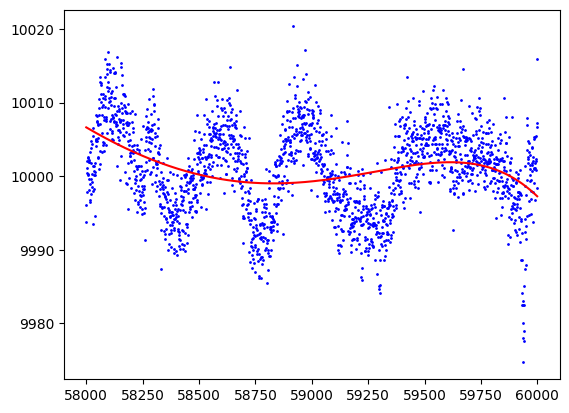

plot30, coef= [-6.24033628e-228 -2.02496997e-228 -1.88714071e-234 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -1.13635099e-322 -6.48606910e-318
 -3.60595837e-313 -1.99289225e-308 -1.09442530e-303 -5.96901792e-299
 -3.23118088e-294 -1.73471973e-289 -9.22786021e-285 -4.85820497e-280
 -2.52772779e-275 -1.29741017e-270 -6.55400229e-266 -3.24859116e-261
 -1.57349690e-256 -7.40555398e-252 -3.35909571e-247 -1.45036280e-242
 -5.84193880e-238 -2.11679604e-233 -6.38893025e-229 -1.28499969e-224
  4.25122411e-229 -3.51744174e-234]


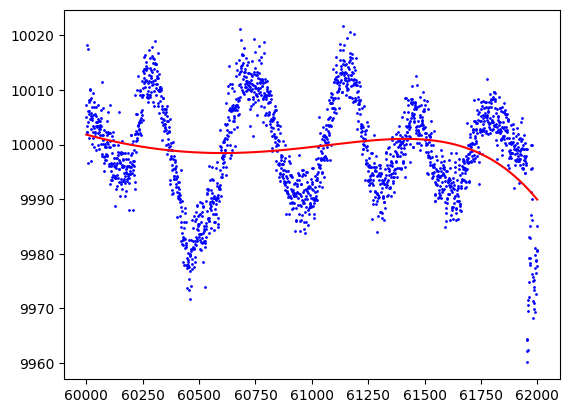

plot31, coef= [-1.41626243e-228 -1.08243688e-228 -5.31932841e-235 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -9.88131292e-324 -7.09092896e-319
 -4.07566107e-314 -2.32871334e-309 -1.32212436e-304 -7.45490567e-300
 -4.17208108e-295 -2.31564566e-290 -1.27348615e-285 -6.93136236e-281
 -3.72839351e-276 -1.97841103e-271 -1.03321982e-266 -5.29452775e-262
 -2.65120445e-257 -1.28996866e-252 -6.04905304e-248 -2.70012706e-243
 -1.12436214e-238 -4.21181236e-234 -1.31418974e-229 -2.73257445e-225
  8.77563883e-230 -7.04834587e-235]


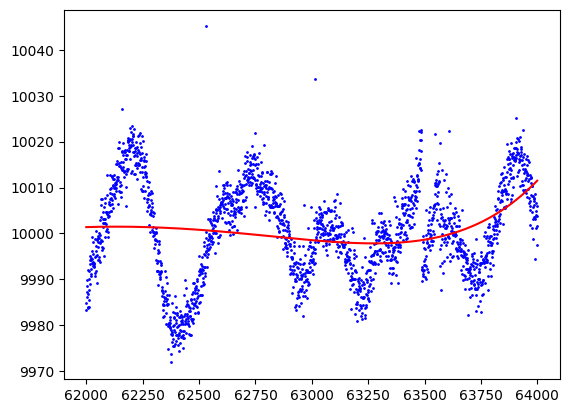

plot32, coef= [ 2.18729817e-229 -4.30760253e-229  3.24920301e-236 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000  5.40013751e-320
  3.20550477e-315  1.89149113e-310  1.10904634e-305  6.45814573e-301
  3.73255253e-296  2.13949852e-291  1.21512235e-286  6.83013810e-282
  3.79417119e-277  2.07919491e-272  1.12138336e-267  5.93431388e-263
  3.06879314e-258  1.54199821e-253  7.46743797e-249  3.44228768e-244
  1.48029105e-239  5.72647097e-235  1.84523838e-230  3.96225098e-226
 -1.23810493e-230  9.67515136e-236]


In [ ]:
from sklearn.metrics import mean_squared_error
poly = PolynomialFeatures(degree=50, include_bias=False)

window_size = 2000
num_windows = len(X) // window_size  # Calculate the number of windows

# Split X into windows
X_windows = [X[i * window_size: (i + 1) * window_size] for i in range(num_windows)]
y_windows = [y[i * window_size: (i + 1) * window_size] for i in range(num_windows)]

loss = []

# Now you can process each window separately
for i, (X_window, y_window) in enumerate(zip(X_windows, y_windows)):
    X_transf_window = poly.fit_transform(X_window)
    model = LinearRegression()
    model.fit(X_transf_window, y_window)
    y_values_window = model.predict(X_transf_window)

    plt.scatter(X_window,y_window, s=1, color='blue')
    plt.plot(X_window,y_values_window, color='red')
    plt.show()
    loss.append(mean_squared_error(y_values_window,y_window))
    print(f'plot{i+1}, coef= {model.coef_[0]}')

[]

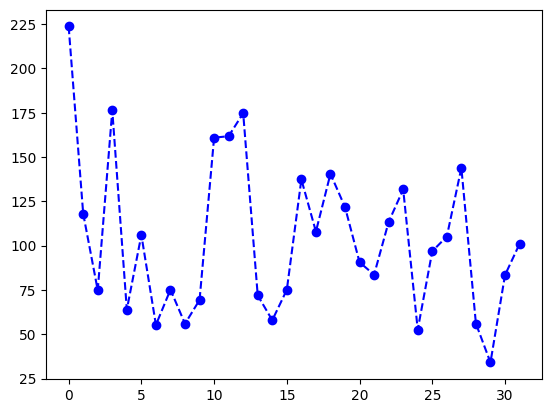

In [ ]:
plt.plot(np.arange(32),loss,'b--o')
plt.plot()